# 1) JSON Format

The data set we'll use in this lesson is in a format called JavaScript Object Notation (**JSON**). As the name indicates, JSON originated from the JavaScript language, but has now become a language-independent format.

From a Python perspective, JSON can be thought of as a collection of Python objects nested inside each other.

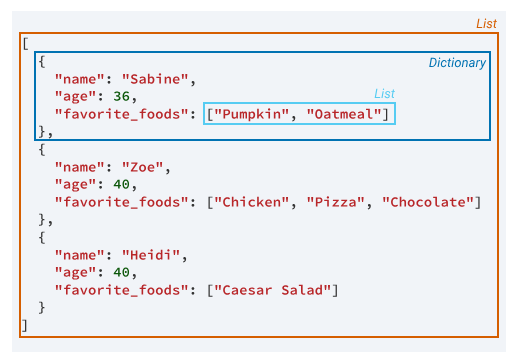

The JSON above is a list, where each element in the list is a dictionary. Each of the dictionaries have the same keys, and one of the values of each dictionary is itself a list.

The Python json module contains a number of functions to make working with JSON objects easier. We can use the `json.loads()` method to convert JSON data contained in a string to the equivalent set of Python objects:

In [1]:
json_string = """
[
  {
    "name": "Sabine",
    "age": 36,
    "favorite_foods": ["Pumpkin", "Oatmeal"]
  },
  {
    "name": "Zoe",
    "age": 40,
    "favorite_foods": ["Chicken", "Pizza", "Chocolate"]
  },
  {
    "name": "Heidi",
    "age": 40,
    "favorite_foods": ["Caesar Salad"]
  }
]
"""

import json
json_obj = json.loads(json_string)
print(type(json_obj))

print(json_obj)

<class 'list'>
[{'name': 'Sabine', 'age': 36, 'favorite_foods': ['Pumpkin', 'Oatmeal']}, {'name': 'Zoe', 'age': 40, 'favorite_foods': ['Chicken', 'Pizza', 'Chocolate']}, {'name': 'Heidi', 'age': 40, 'favorite_foods': ['Caesar Salad']}]


We can observe a few things:

The formatting from our original string is gone. This is because printing Python lists and dictionaries has a simple formatting structure.

The order of the keys in the dictionary may appear different. While Python dictionaries maintain insertion order in modern versions, the JSON specification does not guarantee key order preservation. This means that when working with JSON data, the order of keys might not always be consistent.

# Instructions

Let's practice using `json.loads()` to convert JSON data from a string to Python objects!

We have created a JSON string, world_cup_str, which contains data about games from the 2018 Football World Cup.

1. Import the json module.

1. Use `json.loads()` to convert `world_cup_str` to a Python object. Assign the result to `world_cup_obj`.

In [2]:
world_cup_str = """
[
    {
        "team_1": "France",
        "team_2": "Croatia",
        "game_type": "Final",
        "score" : [4, 2]
    },
    {
        "team_1": "Belgium",
        "team_2": "England",
        "game_type": "3rd/4th Playoff",
        "score" : [2, 0]
    }
]
"""

import json

world_cup_obj = json.loads(world_cup_str)

# 2) Reading a JSON file

One of the places where the JSON format is commonly used is in the results returned by an Application programming interface (**API**). APIs are interfaces that can be used to send and transmit data between different computer systems

The data set from this lesson — `hn_2014.json` — was downloaded from the Hacker News API. It's a different set of data from the CSV we've been using in the previous two lessons, and it contains data about stories from Hacker News in 2014.

To read a file from JSON format, we use the `json.load()` function. Note that the function is `json.load()` without an "s" at the end. The `json.loads()` function is used for **loading JSON data from a string** ("loads" is short for "load string"), whereas the `json.load()` function is used to **load from a file object**. Let's look at how we would read that in our data:

*Note that we're using with to open the file, which is a better practice than just using `open()`*

```
import json
with open("hn_2014.json", "r") as file:
    hn = json.load(file)

print(type(hn))
```

Our hn variable is a **list**. Let's find out **how many objects** are in the list, and the type of the first object (which will almost always be the type of every object in the list in **JSON data**):

```
print(len(hn))
print(type(hn[0]))
```

Our data set contains **35,806 dictionary objects**, each representing a Hacker News story. In order to understand the format of our data set, we'll print the keys of the first dictionary:

``` 
print(hn[0].keys())

dict_keys(['author', 'numComments', 'points', 'url', 'storyText', 'createdAt', 'tags', 'createdAtI', 'title', 'objectId'])
```

If we recall the data set we used in the previous two lessons, we can see some similarities. There are keys representing the title, **URL**, **points**, **number of comments**, and **date**, as well as some **others** that are less familiar to us. Here is a summary of the keys and the data that they contain:

`author`: The username of the person who submitted the story.
`createdAt`: The date and time at which the story was created.
`createdAtI`: An integer value representing the date and time at which the story was created.
`numComments`: The number of comments that were made on the story.
`objectId`: The unique identifier from Hacker News for the story.
`points`: The number of points the story acquired, calculated as the total number of upvotes minus the total number of downvotes.
`storyText`: The text of the story (if the story contains text).
`tags`: A list of tags associated with the story.
`title`: The title of the story.
`url`: The URL that the story links to (if the story links to a URL).

## Instructions

1. Use the `open()` function to open the `hn_2014.json` file as a file object.

1. Use the `json.load()` function to parse the file object and assign the result to hn.

In [ ]:
with open("04_Data_Cleaning/04_2_Advanced_data_cleaning/hn_2014.json", "r") as file:
    hn = json.load(file)

# 3 Deleting Dictionary Keys

Let's look at the first dictionary in full. To make it easier to understand, we're going to create a function which will print a JSON object with formatting to make it easier to read.

The function will use the `json.dumps()` function ("**dump string**") which does the opposite of the ``json.loads()`` function — it takes a **JSON object and returns a string version** of it. 

The `json.dumps()` function accepts arguments that can specify formatting for the string, which we'll use to make things easier to read: